# Emergency 911 Calls Exploratory Data Analysis

## In this project, we are looking at 911 call data from Montgomery, PA.
Relevant data points:

    * lat: String, Latitude
    * lng: String, Longitude
    * desc: String, Description of call
    * zip: String, Zipcode
    * title: String, Title
    * timeStamp: String, Format YYYY-MM-DD HH:MM:SS 
    * twp : String, Township
    * addr: String, Address
   

In [18]:
import numpy as np 
import pandas as pd 

In [63]:
import matplotlib.pyplot as plt
%matplotlib inline

In [64]:
df = pd.read_csv("./911.csv") 
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [22]:
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1


** How many unique titles are present? **


In [25]:
df['title'].nunique()

110

** What are the top 5 zipcodes and townships? **

In [27]:
top_zipcodes = df['zip'].value_counts().head(5)
top_zipcodes

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

In [29]:
top_townships = df['twp'].value_counts().head(5)
top_townships

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

## Creating new features 


#### Let's add a column to the dataset pertaining to the reason for calling 911.   We can extract and transform this data from the "title" column.  

In [31]:
df['Reason'] = df['title'].apply(lambda title: title.split(':')[0]) 

** What is the most common reason for calling 911 based on the newly created "Reason" column? **

In [32]:
df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

** Visualize 911 calls by "Reason" with seaborn countplot ** 

<AxesSubplot:xlabel='Reason', ylabel='count'>

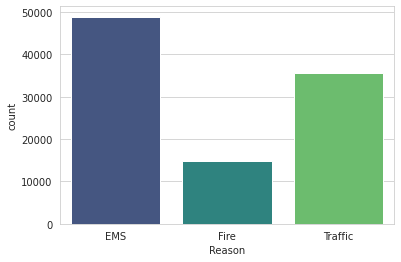

In [36]:
import seaborn as sns
sns.set_style('whitegrid')

sns.countplot(x='Reason', data=df, palette='viridis')

### Now let's bring our focus to the date/time information in the "timeStamp" column. 

** What is the data type of the objects in the column? **

In [37]:
type(df['timeStamp'].iloc[0])

str

** Convert these objects to DateTime objects.  This will extend access to specific attributes of objects respectively. ** 

In [38]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

** Now we can create additional columns representing the hour, month and day of the week. ** 

In [39]:
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Day of Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)

In [40]:
map_days = {0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}
df['Day of Week'] = df['Day of Week'].map(map_days)

** Below is a countplot visualization for "Day of Week" column with hue indicative of the "Reason" (column). **

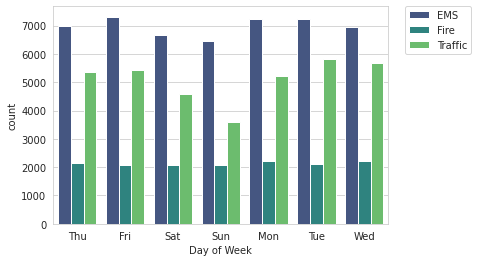

In [43]:
sns.countplot(x='Day of Week',data=df,hue='Reason',palette='viridis')

#Legend placement
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

** But if we do the same visualization for Months... **

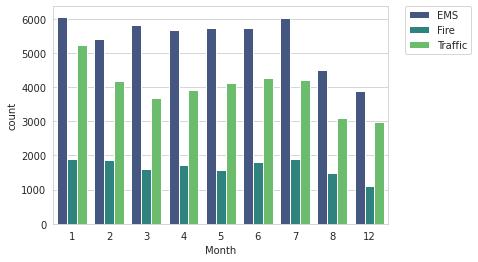

In [44]:
sns.countplot(x='Month', data=df, hue='Reason', palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

** We can observe that the dataset has missing data.  Months September to October are missing in the visualization. **

** Let's perform some light data imputation and attempt to fill in the missing data. **

In [45]:
by_month  = df.groupby('Month').count() 
by_month.head() 

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


** Here is a simple line plot of imputated data indicating calls per month. ** 

<AxesSubplot:xlabel='Month'>

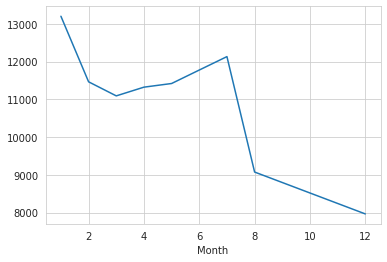

In [46]:
#Any column can be utilized.  Let's use "twp".
by_month['twp'].plot()

** Apply a linear fit. **

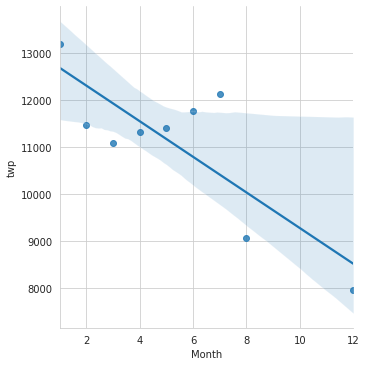

In [48]:
sns.lmplot(x='Month', y='twp', data=by_month.reset_index())

** Create a new column calles 'Date' from "timeStamp" column. **

In [49]:
df['Date']=df['timeStamp'].apply(lambda t: t.date()) 

** Visualize with the count() aggregate for 911 calls **

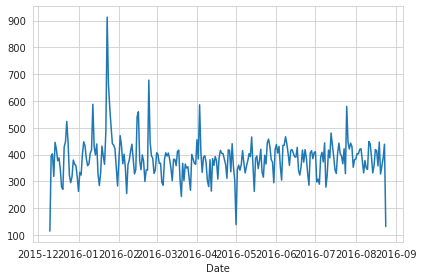

In [51]:
df.groupby('Date').count()['twp'].plot() 
plt.tight_layout() 

** To better understand the data, we can create 3 seperate plots representative of the reason for the the 911 call **

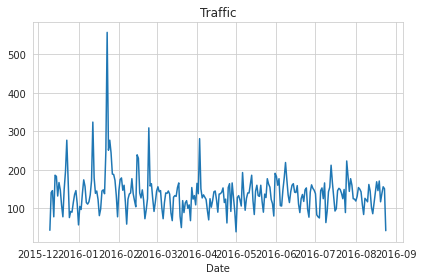

In [52]:
#Traffic
df[df['Reason']=='Traffic'].groupby('Date').count()['twp'].plot() 
plt.title('Traffic')
plt.tight_layout() 

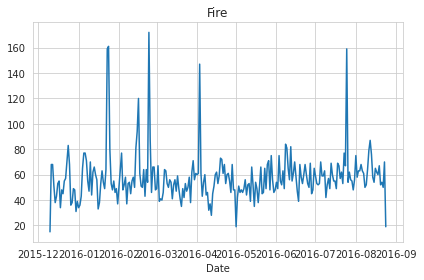

In [53]:
#Fire
df[df['Reason']=='Fire'].groupby('Date').count()['twp'].plot() 
plt.title('Fire')
plt.tight_layout() 

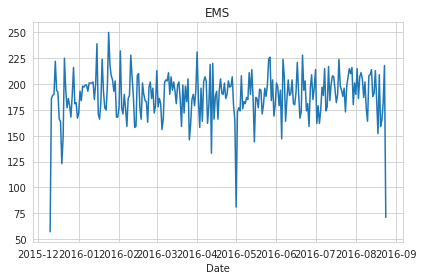

In [54]:
#EMS
df[df['Reason']=='EMS'].groupby('Date').count()['twp'].plot()
plt.title('EMS')
plt.tight_layout() 

### Heatmaps 

** Will require some restucturing of data **


In [56]:
#Use Days of Week for index
day_hour = df.groupby(by=['Day of Week', 'Hour']).count()['Reason'].unstack() 
day_hour.head() 

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


** Create heatmap with new DataFrame by hour. ** 

<AxesSubplot:xlabel='Hour', ylabel='Day of Week'>

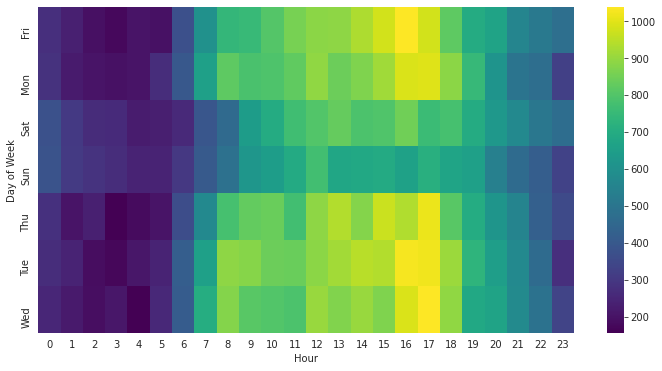

In [58]:
plt.figure(figsize=(12,6))
sns.heatmap(day_hour, cmap='viridis') 

 ** Clustermap with new DataFrame ** 

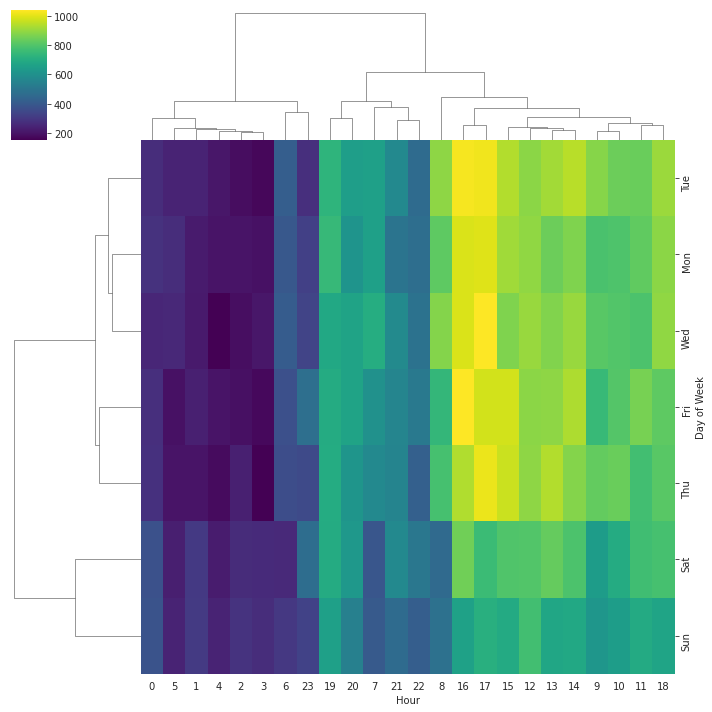

In [59]:
sns.clustermap(day_hour, cmap='viridis') 

** By month. ** 

In [60]:
day_month = df.groupby(by=['Day of Week','Month']).count()['Reason'].unstack()
day_month.head()

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266


<AxesSubplot:xlabel='Month', ylabel='Day of Week'>

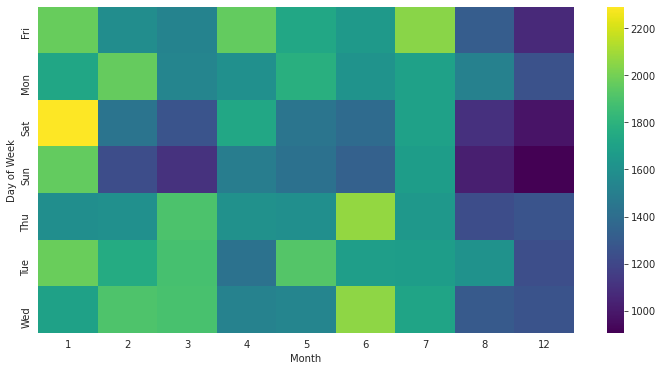

In [61]:
plt.figure(figsize=(12,6))
sns.heatmap(day_month, cmap='viridis')

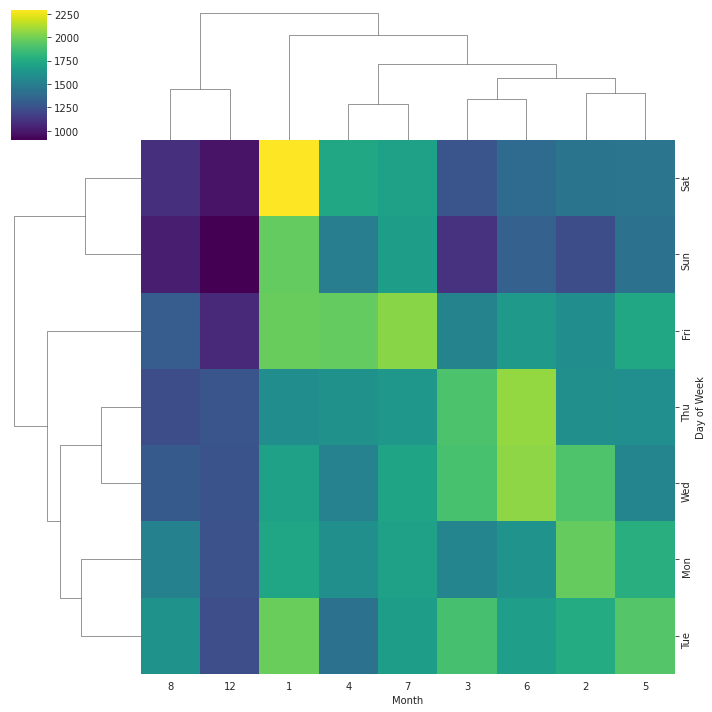

In [62]:
sns.clustermap(day_month, cmap='viridis')